In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift

from classicalfield_orig import FiniteTempGPE as gpe 

Trying a higher potential well 


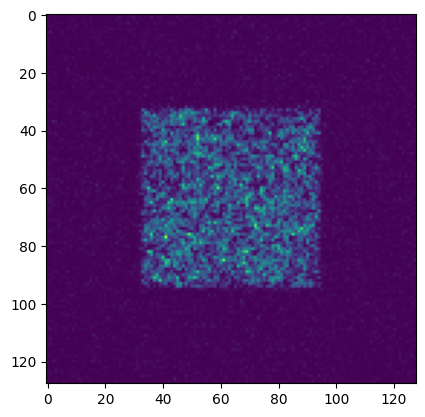

In [169]:
imported_data = np.loadtxt('thinnerboxoutput.csv', dtype = np.complex_)
plt.imshow(np.abs(imported_data)**2)

No vortices to be spawned
Total Imag Time:  1.2628495693206787
kmax:  5.026548245743669
T:  6.316546816697189
(21913, 128, 128)
(1, 128, 128)


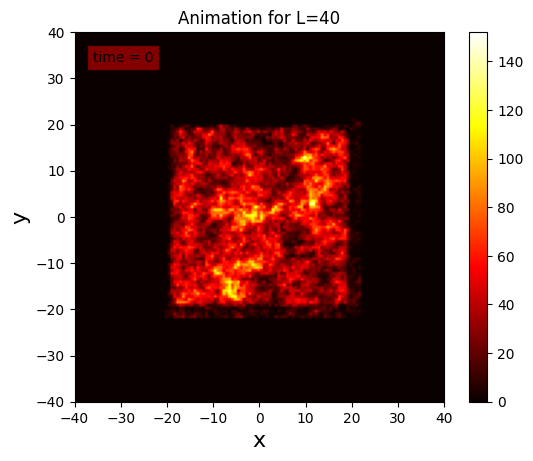

In [3]:
# test out to see if the new potential is good 
# originally: 2250000
g = gpe(L = 40, npoints = 2**6, numImagSteps = 2000, numRealSteps = 5478000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName = 'testparams_smallerbox.mp4', Tfact = 1/2, dst = False)



In [5]:
print(g.time_tracking)

[0, 0.0, 0.048828125, 0.09765625, 0.146484375, 0.1953125, 0.244140625, 0.29296875, 0.341796875, 0.390625, 0.439453125, 0.48828125, 0.537109375, 0.5859375, 0.634765625, 0.68359375, 0.732421875, 0.78125, 0.830078125, 0.87890625, 0.927734375, 0.9765625, 1.025390625, 1.07421875, 1.123046875, 1.171875, 1.220703125, 1.26953125, 1.318359375, 1.3671875, 1.416015625, 1.46484375, 1.513671875, 1.5625, 1.611328125, 1.66015625, 1.708984375, 1.7578125, 1.806640625, 1.85546875, 1.904296875, 1.953125, 2.001953125, 2.05078125, 2.099609375, 2.1484375, 2.197265625, 2.24609375, 2.294921875, 2.34375, 2.392578125, 2.44140625, 2.490234375, 2.5390625, 2.587890625, 2.63671875, 2.685546875, 2.734375, 2.783203125, 2.83203125, 2.880859375, 2.9296875, 2.978515625, 3.02734375, 3.076171875, 3.125, 3.173828125, 3.22265625, 3.271484375, 3.3203125, 3.369140625, 3.41796875, 3.466796875, 3.515625, 3.564453125, 3.61328125, 3.662109375, 3.7109375, 3.759765625, 3.80859375, 3.857421875, 3.90625, 3.955078125, 4.00390625, 4.05

In [6]:
print(g.gpeobj.dt*5)

0.00041259765625000004


In [168]:
np.savetxt('thinnerboxoutput.csv', g.snaps[-1])

In [3]:
print((1000-686)/g.gpeobj.dt/250)
print(686 + 2600*250*g.gpeobj.dt)
print(1000/g.gpeobj.dt)
print(np.shape(g.snaps))

4115.6608
884.3642578125
3276800.0
(13109, 128, 128)


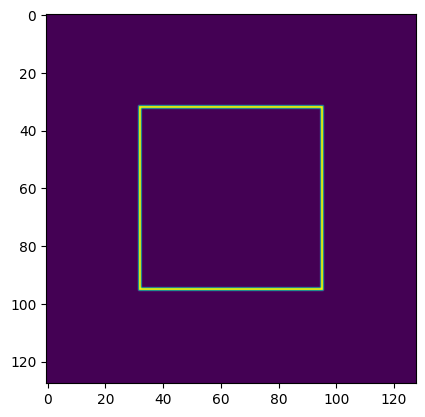

In [7]:
plt.figure() 
plt.imshow(g.gpeobj.Vbox)

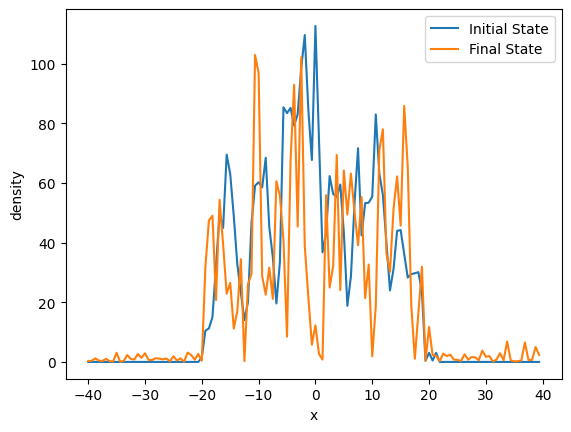

In [6]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.snaps[0][len(g.snaps[0])//2])**2, label = 'Initial State')
plt.plot(g.xi[0][0], np.abs(g.snaps[-1][len(g.snaps[-1])//2])**2, label = 'Final State')
plt.xlabel('x')
plt.ylabel('density')
plt.legend() 

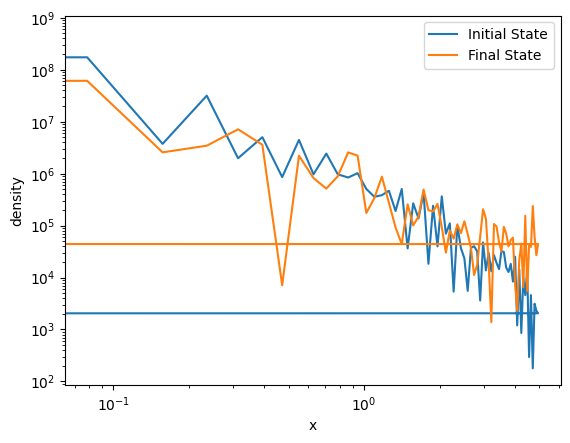

In [7]:
plt.figure() 
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[0])[0])**2, label = 'Initial State')
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[-1])[0])**2, label = 'Final State')
plt.xlabel('x')
plt.ylabel('density')
plt.xscale('log')
plt.yscale('log')
plt.legend() 

MISC

In [108]:
# export file 
output = np.savetxt('output.csv', g.snaps[-1])

In [24]:
print(len(g.snaps))

4001


In [8]:
# get the energies and stats

print("Temperature: ", g.T) 
print("Kinetic Energy: ", g.gpeobj.kmax**2/2)
print("Potential Energy: ", np.max(g.gpeobj.Vbox))
print("Interaction Energy: ", g.gpeobj.g*np.max(np.abs(g.gs)**2))
print("Total Time: ", g.numRealSteps*g.gpeobj.dt) 
print("Time Step: ", g.gpeobj.dt)
print("Number of Atoms: ", g.gpeobj.Natoms) 

Temperature:  6.316546816697189
Kinetic Energy:  12.633093633394378
Potential Energy:  31.078981089926003
Interaction Energy:  1.117375850727765
Total Time:  1069.921875
Time Step:  0.0001953125
Number of Atoms:  64000


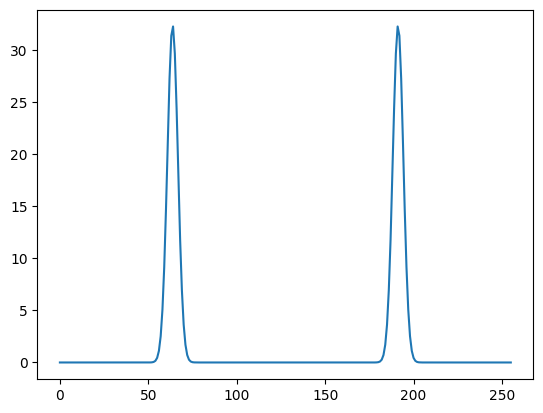

In [6]:
plt.figure() 
plt.plot(g.gpeobj.Vbox[len(g.gpeobj.Vbox)//2])
#plt.colorbar() 
plt.show() 

In [9]:
print(g.gpeobj.Vbox.nbytes)

NameError: name 'g' is not defined

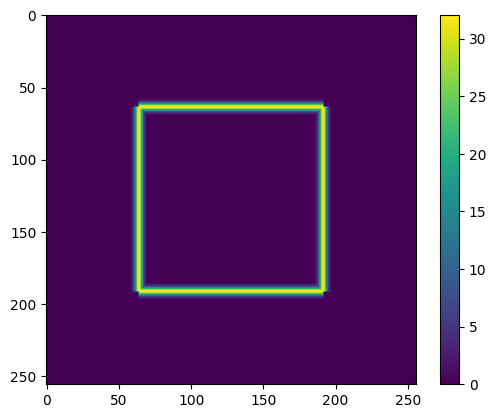

In [4]:
plt.figure() 
plt.imshow(g.gpeobj.Vbox)
plt.colorbar() 

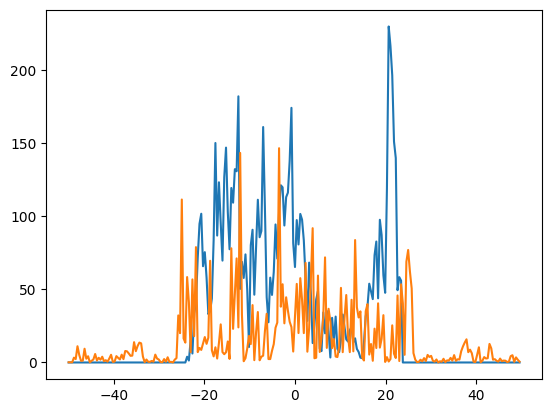

In [8]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.snaps[0][len(g.snaps[0])//2])**2)
plt.plot(g.xi[0][0], np.abs(g.snaps[-1][len(g.snaps[-1])//2])**2)

In [9]:
from scipy.fft import fft2, ifft2, fftshift, ifftshift

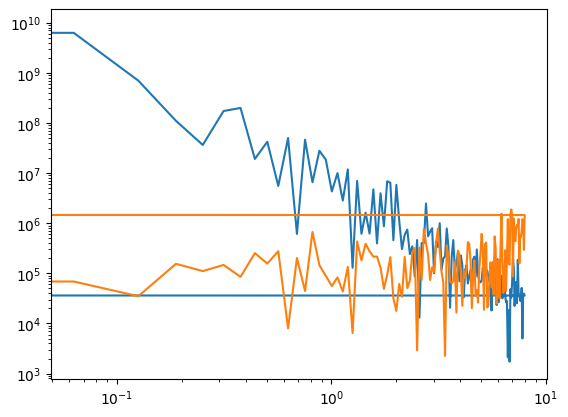

In [14]:
plt.figure() 
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[0])[0])**2)
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[-1])[0])**2)
plt.yscale('log')
plt.xscale('log')

In [7]:
print(100/g.gpeobj.dt)

1310720.0


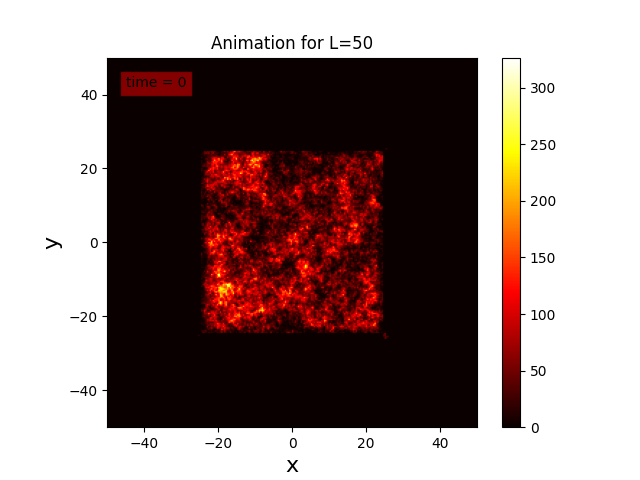

In [3]:
%matplotlib widget 
g.animatepsi2d('test_box.mp4')